In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.model_selection import train_test_split
import xicorpy as xi

In [143]:
nelson = pd.read_csv('datasets/Nelson.csv',index_col=False)

In [144]:
nelson.dropna(inplace=True)
nelson.index = nelson.date
nelson.index = pd.to_datetime(nelson.index)
nelson = nelson[['Nelson', 'lagged']]
nelson.head(5)

,Nelson,lagged
date,,
1992-02-29,108000.0,115000.0
1992-03-31,115000.0,108000.0
1992-04-30,116000.0,115000.0
1992-05-31,115000.0,116000.0
1992-06-30,107000.0,115000.0


# Other datasets

In [132]:
headers = [
    "Real_GDP_Production-based_$m",
    "Real_GDP_Production-based_$m_s.a.",
    "Real_GDP_Production-based_q/q%_s.a.",
    "Real_GDP_Production-based_y/y%",
    "Nominal_GDP_Expenditure-based_$m",
    "Nominal_GDP_Expenditure-based_$m_s.a.",
    "Nominal_GDP_Expenditure-based_q/q%_s.a.",
    "Nominal_GDP_Expenditure-based_y/y%",
    "Real_GDP_Expenditure-based_$m",
    "Real_GDP_Expenditure-based_$m_s.a.",
    "Real_GDP_Expenditure-based_q/q%_s.a.",
    "Real_GDP_Expenditure-based_y/y%",
    "Nominal_Private_consumption_$m",
    "Nominal_Private_consumption_$m_s.a.",
    "Nominal_Private_consumption_q/q%_s.a.",
    "Nominal_Private_consumption_y/y%",
    "Real_Private_consumption_$m",
    "Real_Private_consumption_$m_s.a.",
    "Real_Private_consumption_q/q%_s.a.",
    "Real_Private_consumption_y/y%",
    "Nominal_Gov_consumption_$m",
    "Nominal_Gov_consumption_$m_s.a.",
    "Nominal_Gov_consumption_q/q%_s.a.",
    "Nominal_Gov_consumption_y/y%",
    "Real_Gov_consumption_$m",
    "Real_Gov_consumption_$m_s.a.",
    "Real_Gov_consumption_q/q%_s.a.",
    "Real_Gov_consumption_y/y%",
    "Nominal_Inventories_change_$m",
    "Nominal_Inventories_change_$m_s.a.",
    "Nominal_Inventories_change_q/q%_s.a.",
    "Nominal_Inventories_change_y/y%",
    "Real_Fixed_capital_residential_$m",
    "Real_Fixed_capital_residential_$m_s.a.",
    "Real_Fixed_capital_residential_q/q%_s.a.",
    "Real_Fixed_capital_residential_y/y%",
    "Nominal_Fixed_capital_residential_$m",
    "Nominal_Fixed_capital_residential_$m_s.a.",
    "Nominal_Fixed_capital_residential_q/q%_s.a.",
    "Nominal_Fixed_capital_residential_y/y%",
    "Real_Fixed_capital_other_$m",
    "Real_Fixed_capital_other_$m_s.a.",
    "Real_Fixed_capital_other_q/q%_s.a.",
    "Real_Fixed_capital_other_y/y%",
    "Nominal_Fixed_capital_other_$m",
    "Nominal_Fixed_capital_other_$m_s.a.",
    "Nominal_Fixed_capital_other_q/q%_s.a.",
    "Nominal_Fixed_capital_other_y/y%",
    "Real_National_expenditure_$m",
    "Real_National_expenditure_$m_s.a.",
    "Real_National_expenditure_q/q%_s.a.",
    "Real_National_expenditure_y/y%",
    "Nominal_National_expenditure_$m",
    "Nominal_National_expenditure_$m_s.a.",
    "Nominal_National_expenditure_q/q%_s.a.",
    "Nominal_National_expenditure_y/y%",
    "Real_Exports_goods_services_$m",
    "Real_Exports_goods_services_$m_s.a.",
    "Real_Exports_goods_services_q/q%_s.a.",
    "Real_Exports_goods_services_y/y%",
    "Nominal_Exports_goods_services_$m",
    "Nominal_Exports_goods_services_$m_s.a.",
    "Nominal_Exports_goods_services_q/q%_s.a.",
    "Nominal_Exports_goods_services_y/y%",
    "Real_Imports_goods_services_$m",
    "Real_Imports_goods_services_$m_s.a.",
    "Real_Imports_goods_services_q/q%_s.a.",
    "Real_Imports_goods_services_y/y%",
    "Nominal_Imports_goods_services_$m",
    "Nominal_Imports_goods_services_$m_s.a.",
    "Nominal_Imports_goods_services_q/q%_s.a.",
    "Nominal_Imports_goods_services_y/y%"
]

In [137]:
gdp = pd.read_excel('datasets/gdp.xlsx', skiprows=4)
gdp.index = pd.to_datetime(gdp[gdp.columns[0]])
gdp.index.name = 'date'
gdp.drop(columns=gdp.columns[0], inplace=True)
gdp.columns = headers

In [138]:
gdp.head(5)

,Real_GDP_Production-based_$m,Real_GDP_Production-based_$m_s.a.,Real_GDP_Production-based_q/q%_s.a.,Real_GDP_Production-based_y/y%,Nominal_GDP_Expenditure-based_$m,Nominal_GDP_Expenditure-based_$m_s.a.,Nominal_GDP_Expenditure-based_q/q%_s.a.,Nominal_GDP_Expenditure-based_y/y%,Real_GDP_Expenditure-based_$m,Real_GDP_Expenditure-based_$m_s.a.,...,Nominal_Exports_goods_services_q/q%_s.a.,Nominal_Exports_goods_services_y/y%,Real_Imports_goods_services_$m,Real_Imports_goods_services_$m_s.a.,Real_Imports_goods_services_q/q%_s.a.,Real_Imports_goods_services_y/y%,Nominal_Imports_goods_services_$m,Nominal_Imports_goods_services_$m_s.a.,Nominal_Imports_goods_services_q/q%_s.a.,Nominal_Imports_goods_services_y/y%
date,,,,,,,,,,,,,,,,,,,,,
1987-06-30,27610,27981,NaN,NaN,15519,15788,NaN,NaN,26073,26643,...,NaN,NaN,3980,4038,NaN,NaN,4594,4637,NaN,NaN
1987-09-30,27751,28132,0.5,NaN,15752,16099,2.0,NaN,26431,26712,...,4.3,NaN,4052,3876,-4.0,NaN,4636,4448,-4.1,NaN
1987-12-31,29109,28260,0.5,NaN,16974,16367,1.7,NaN,27738,26780,...,-0.3,NaN,4049,3914,1.0,NaN,4907,4728,6.3,NaN
1988-03-31,28070,28150,-0.4,NaN,16923,16887,3.2,NaN,26792,26879,...,0.9,NaN,3498,3741,-4.4,NaN,4290,4617,-2.3,NaN
1988-06-30,27637,28018,-0.5,0.1,16592,16846,-0.2,6.9,26383,26924,...,-2.1,2.8,3642,3697,-1.2,-8.5,4519,4566,-1.1,-1.6


In [150]:
nelson_gdp = nelson.merge(gdp, on='date', how='inner')

In [153]:
nelson_gdp.head(5)

,Nelson,lagged,Real_GDP_Production-based_$m,Real_GDP_Production-based_$m_s.a.,Real_GDP_Production-based_q/q%_s.a.,Real_GDP_Production-based_y/y%,Nominal_GDP_Expenditure-based_$m,Nominal_GDP_Expenditure-based_$m_s.a.,Nominal_GDP_Expenditure-based_q/q%_s.a.,Nominal_GDP_Expenditure-based_y/y%,...,Nominal_Exports_goods_services_q/q%_s.a.,Nominal_Exports_goods_services_y/y%,Real_Imports_goods_services_$m,Real_Imports_goods_services_$m_s.a.,Real_Imports_goods_services_q/q%_s.a.,Real_Imports_goods_services_y/y%,Nominal_Imports_goods_services_$m,Nominal_Imports_goods_services_$m_s.a.,Nominal_Imports_goods_services_q/q%_s.a.,Nominal_Imports_goods_services_y/y%
date,,,,,,,,,,,,,,,,,,,,,
1992-03-31,115000.0,108000.0,27933,27985,0.3,0.6,19433,19305,1.6,4.0,...,-4.4,4.5,4906,5281,8.8,8.8,5126,5559,7.8,5.6
1992-06-30,107000.0,115000.0,27522,27988,0.0,1.2,19389,19485,0.9,5.3,...,7.5,10.0,5263,5399,2.2,16.4,5373,5488,-1.3,7.0
1992-09-30,120000.0,116000.0,27239,27772,-0.8,0.1,17897,18973,-2.6,-1.4,...,-3.0,2.5,5814,5474,1.4,18.9,5920,5570,1.5,10.0
1992-12-31,124000.0,122500.0,29195,28122,1.3,0.9,20561,19515,2.9,2.9,...,0.4,0.3,5819,5615,2.6,15.6,5954,5743,3.1,11.2
1993-03-31,126000.0,125000.0,28529,28583,1.6,2.1,20462,20291,4.0,5.3,...,0.8,5.5,5071,5481,-2.4,3.4,5182,5626,-2.0,1.1


# EDA

In [155]:
xi.compute_xi_correlation(nelson, nelson.Nelson)

,Nelson
Nelson,1.000000
lagged,0.832985


In [154]:
xi.compute_xi_correlation(nelson_gdp, nelson_gdp.Nelson)

,Nelson
Nelson,1.000000
lagged,0.847281
Real_GDP_Production-based_$m,0.877618
Real_GDP_Production-based_$m_s.a.,0.877443
Real_GDP_Production-based_q/q%_s.a.,-0.008151
...,...
Real_Imports_goods_services_y/y%,0.083912
Nominal_Imports_goods_services_$m,0.877618
Nominal_Imports_goods_services_$m_s.a.,0.877618
Nominal_Imports_goods_services_q/q%_s.a.,0.008104


---

In [79]:
train, test = train_test_split(nelson, test_size=0.2, shuffle=True)

In [80]:
train

,Nelson,lagged
date,,
2014-01-31,355000.0,370000.0
2001-12-31,155000.0,151000.0
2000-07-31,140000.0,141500.0
2006-04-30,307000.0,280000.0
2005-04-30,280000.0,302000.0
...,...,...
2010-10-31,345000.0,322000.0
2017-05-31,485000.0,475000.0
1993-10-31,134000.0,128000.0


In [81]:
test

,Nelson,lagged
date,,
2009-03-31,305000.0,320000.0
1993-07-31,125000.0,120000.0
1992-10-31,115000.0,120000.0
2015-07-31,402000.0,360000.0
2019-08-31,520000.0,520000.0
...,...,...
1999-07-31,148000.0,152000.0
2008-06-30,345000.0,312850.0
2019-01-31,550100.0,553000.0


In [82]:
params = {
    "n_estimators": 200,
    "max_depth": 1,
    "min_samples_split": 5,
    "learning_rate": 0.2,
    "loss": "squared_error",
    "random_state": 42
}

In [83]:
gbf = GradientBoostingRegressor(**params)

In [84]:
gbf.fit(train[['lagged']], train[['Nelson']])

C:\Users\spong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(learning_rate=0.2, max_depth=1, min_samples_split=5,
                          n_estimators=200, random_state=42)

In [85]:
pred = gbf.predict(train[['lagged']])

In [86]:
mse = mean_squared_error(pred, train.Nelson)
mae = mean_absolute_error(pred, train.Nelson)
mdae = median_absolute_error(pred, train.Nelson)
print(mse)
print(mae)
print(mdae)

373807865.63293827
14107.287005349599
9907.043550657312


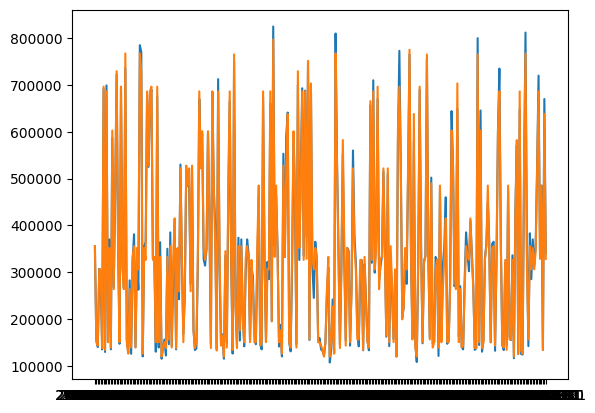

In [87]:
plt.plot(train.index, train.Nelson)
plt.plot(train.index, pred)

In [88]:
test_pred = gbf.predict(test[['lagged']])

In [89]:
mse = mean_squared_error(test_pred, test.Nelson)
mae = mean_absolute_error(test_pred, test.Nelson)
mdae = median_absolute_error(test_pred, test.Nelson)
print(mse)
print(mae)
print(mdae)

893379587.2814648
20599.74249762666
13838.789158200263


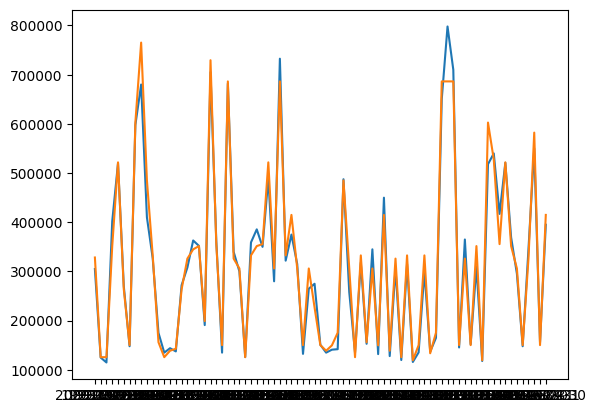

In [91]:
plt.plot(test.index, test.Nelson)
plt.plot(test.index, test_pred)

In [104]:
train = nelson[:-30]

In [113]:
test = nelson[-30:]

In [114]:
gbf.fit(train[['lagged']], train[['Nelson']])

C:\Users\spong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(learning_rate=0.2, max_depth=1, min_samples_split=5,
                          n_estimators=200, random_state=42)

In [115]:
pred = gbf.predict(train[['lagged']])

In [116]:
mse = mean_squared_error(pred, train.Nelson)
mae = mean_absolute_error(pred, train.Nelson)
mdae = median_absolute_error(pred, train.Nelson)
print(mse)
print(mae)
print(mdae)

381584418.7211928
14072.625998217434
9335.180343082757


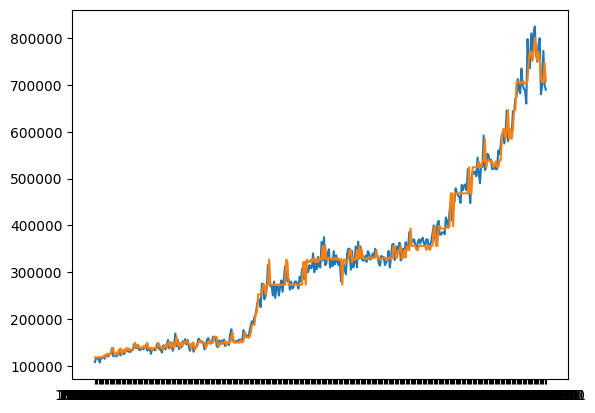

In [117]:
plt.plot(train.index, train.Nelson)
plt.plot(train.index, pred)

In [118]:
test_pred = gbf.predict(test[['lagged']])

In [119]:
mse = mean_squared_error(test_pred, test.Nelson)
mae = mean_absolute_error(test_pred, test.Nelson)
mdae = median_absolute_error(test_pred, test.Nelson)
print(mse)
print(mae)
print(mdae)

1600316171.79991
32798.23324126806
29375.312805051566


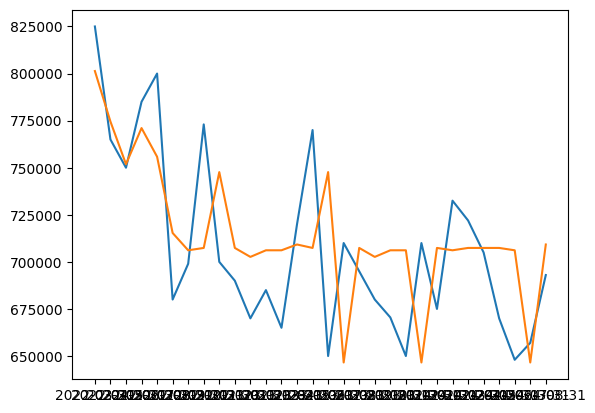

In [120]:
plt.plot(test.index, test.Nelson)
plt.plot(test.index, test_pred)

# Nelson_GDP

In [225]:
params = {
    "n_estimators": 1000,
    "max_depth": 1,
    "min_samples_split": 5,
    "learning_rate": 0.2,
    "loss": "squared_error",
    "random_state": 42
}

In [226]:
gbf = GradientBoostingRegressor(**params)

In [227]:
train, test = train_test_split(nelson_gdp, test_size=0.2, shuffle=False)

In [228]:
gbf.fit(train.drop(columns=['lagged', 'Nelson']), train.Nelson)

GradientBoostingRegressor(learning_rate=0.2, max_depth=1, min_samples_split=5,
                          n_estimators=1000, random_state=42)

In [229]:
pred = gbf.predict(train.drop(columns=['lagged', 'Nelson']))

In [230]:
mse = mean_squared_error(pred, train.Nelson)
mae = mean_absolute_error(pred, train.Nelson)
mdae = median_absolute_error(pred, train.Nelson)
print(mse)
print(mae)
print(mdae)

87099.00331531085
225.90441585063158
191.98160319007002


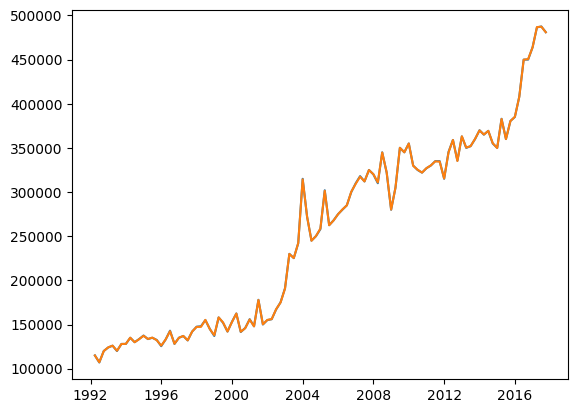

In [231]:
plt.plot(train.index, train.Nelson)
plt.plot(train.index, pred)

In [232]:
pred = gbf.predict(test.drop(columns=['lagged', 'Nelson']))

In [233]:
mse = mean_squared_error(pred, test.Nelson)
mae = mean_absolute_error(pred, test.Nelson)
mdae = median_absolute_error(pred, test.Nelson)
print(mse)
print(mae)
print(mdae)

44941362844.82964
182305.8015985902
190749.91062737638


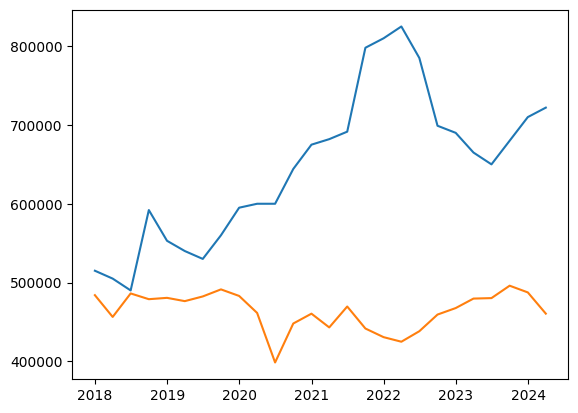

In [234]:
plt.plot(test.index, test.Nelson)
plt.plot(test.index, pred)